# California Housing prices prediction
## The dataset used on this project can be found on https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
data = pd.read_csv("./data/housing.csv")

## Features Description
About this file

Add Suggestion
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars) -> TARGET VALUE
10. oceanProximity: Location of the house w.r.t ocean/sea

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Cleaning null values
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Separating the data
One part to train the model and the other to see if the model is performing well(training and testing data)

In [7]:
from sklearn.model_selection import train_test_split
# x is the dataframe without the target values, y is the target value
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25) # reservates 20% of the data for testing


## Analysing the training data

In [51]:
train_data = X_train.join(y_train)

In [52]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4299,-118.29,34.09,35.0,2198.0,998.0,3441.0,912.0,2.0467,<1H OCEAN,158300.0
3717,-118.42,34.20,24.0,3148.0,908.0,2850.0,839.0,1.9549,<1H OCEAN,221500.0
7364,-118.20,33.97,43.0,825.0,212.0,820.0,184.0,1.8897,<1H OCEAN,174300.0
11578,-118.03,33.77,21.0,3803.0,898.0,1511.0,829.0,3.0000,<1H OCEAN,221200.0
719,-122.10,37.68,37.0,1352.0,342.0,691.0,324.0,3.4032,NEAR BAY,196900.0
...,...,...,...,...,...,...,...,...,...,...
6452,-118.05,34.12,20.0,5218.0,959.0,2302.0,850.0,3.5500,INLAND,476700.0
7479,-118.22,33.93,39.0,1921.0,483.0,2286.0,470.0,3.0167,<1H OCEAN,130000.0
10180,-117.96,33.87,35.0,1972.0,367.0,1152.0,356.0,3.7222,<1H OCEAN,187500.0
16358,-121.29,38.00,12.0,4038.0,1074.0,3440.0,942.0,1.9698,INLAND,112300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

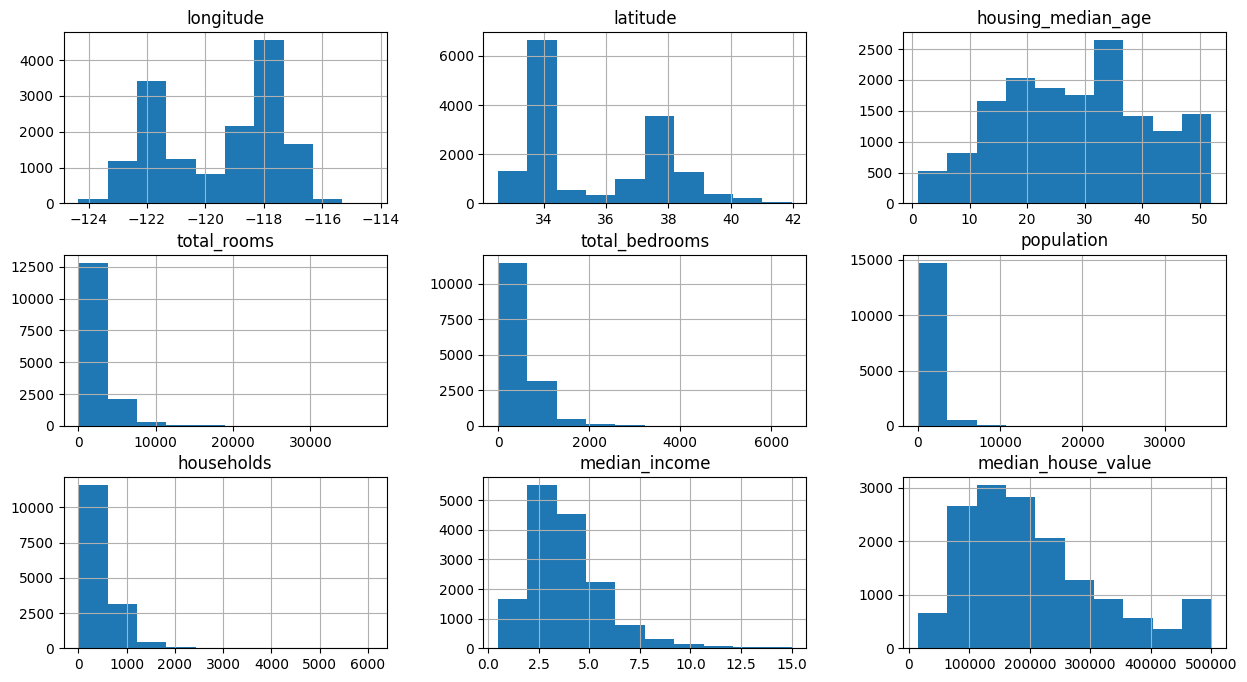

In [53]:
train_data.hist(figsize=(15,8))

## Correlation HeatMap

<Axes: >

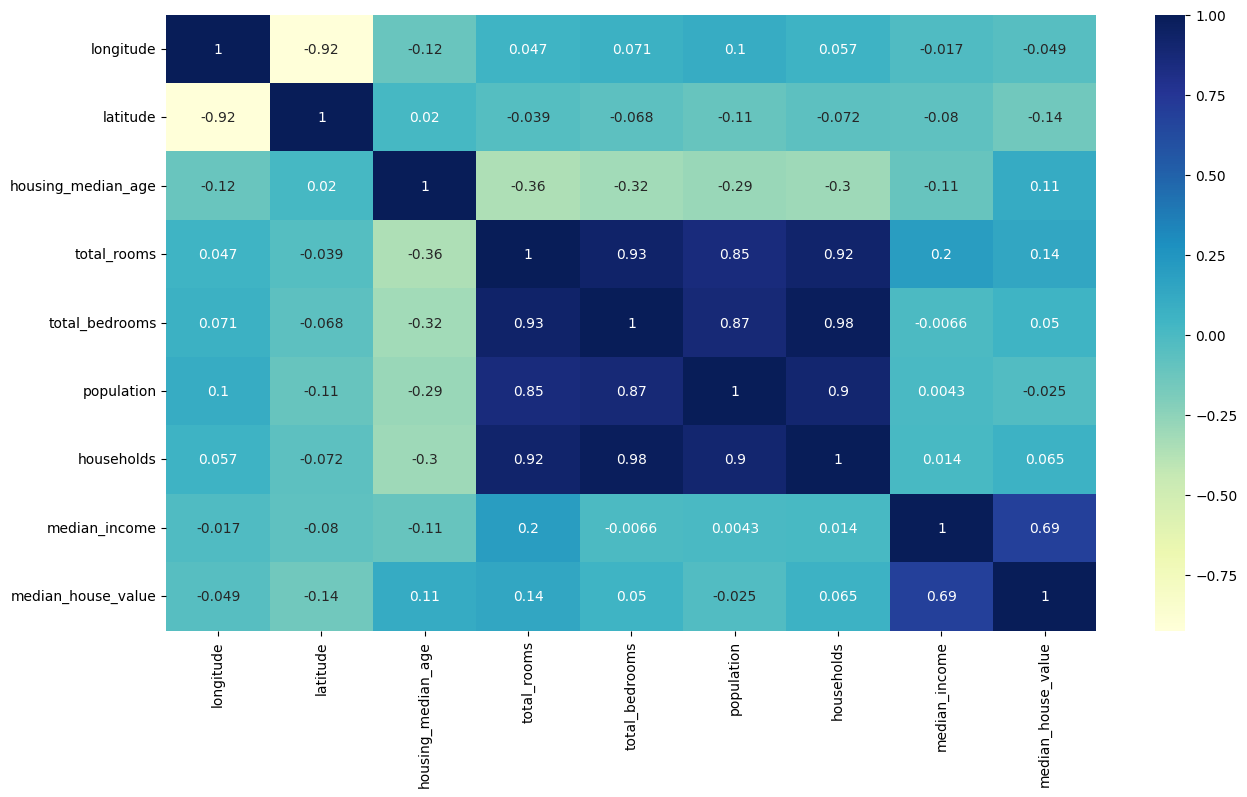

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu") 

Looking at the heatmap, we can see that the median_income_value correlates quite strongly with the median_house_value. Said that, it can be a good predictor for the house value. 

# Data Preprocesing

Some features look skewed, so we're going to take the logarithm of then and see what the distribution looks like

In [55]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) # +1 to prevent 0 values
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1) # +1 to prevent 0 values
train_data['population'] = np.log(train_data['population'] + 1) # +1 to prevent 0 values
train_data['households'] = np.log(train_data['households'] + 1) # +1 to prevent 0 values


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

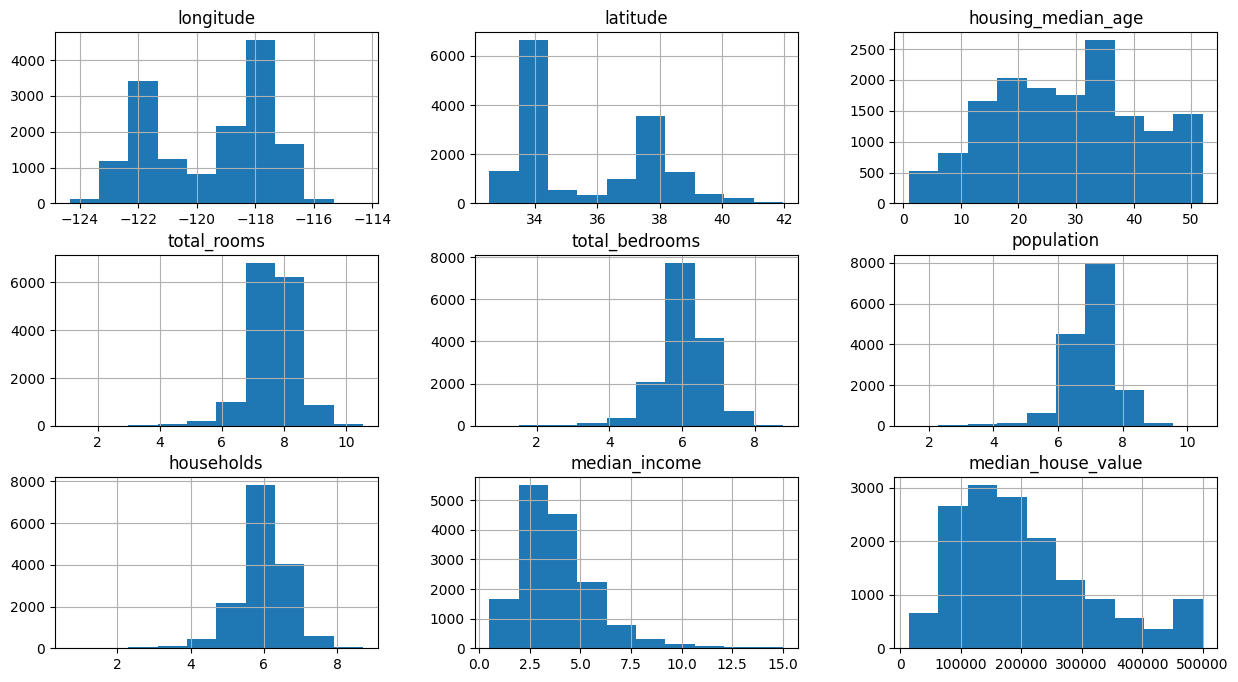

In [56]:
train_data.hist(figsize=(15,8))

## Ocean Proximity

It's reasonable that the proximity of the house to the ocean can deeply influence it's value, so we have to turn the feature values into numerical values, so we can use then.

In [57]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     6711
INLAND        4901
NEAR OCEAN    1981
NEAR BAY      1727
ISLAND           4
Name: count, dtype: int64

Instead of just assigning numerical values, we're going to create a new feature for each one and give it a value of 1 or 0

In [58]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

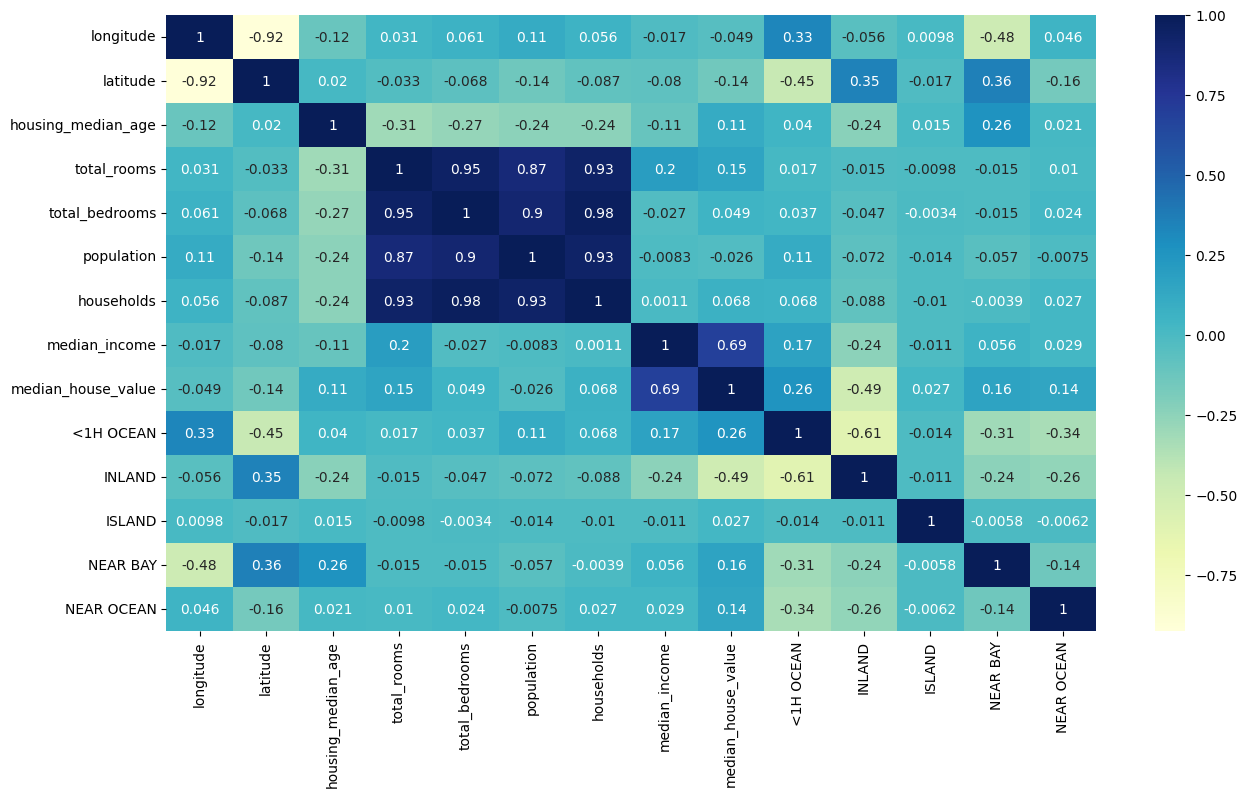

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu") 

Looking at the heatmap, we can see how these new features affect the housing prices. If you want to buy a house inland the correlation is -0.49, which means it's cheaper than < 1h close to ocean, where the correlation is +0.25, haivng more expensive houses. 

<Axes: xlabel='latitude', ylabel='longitude'>

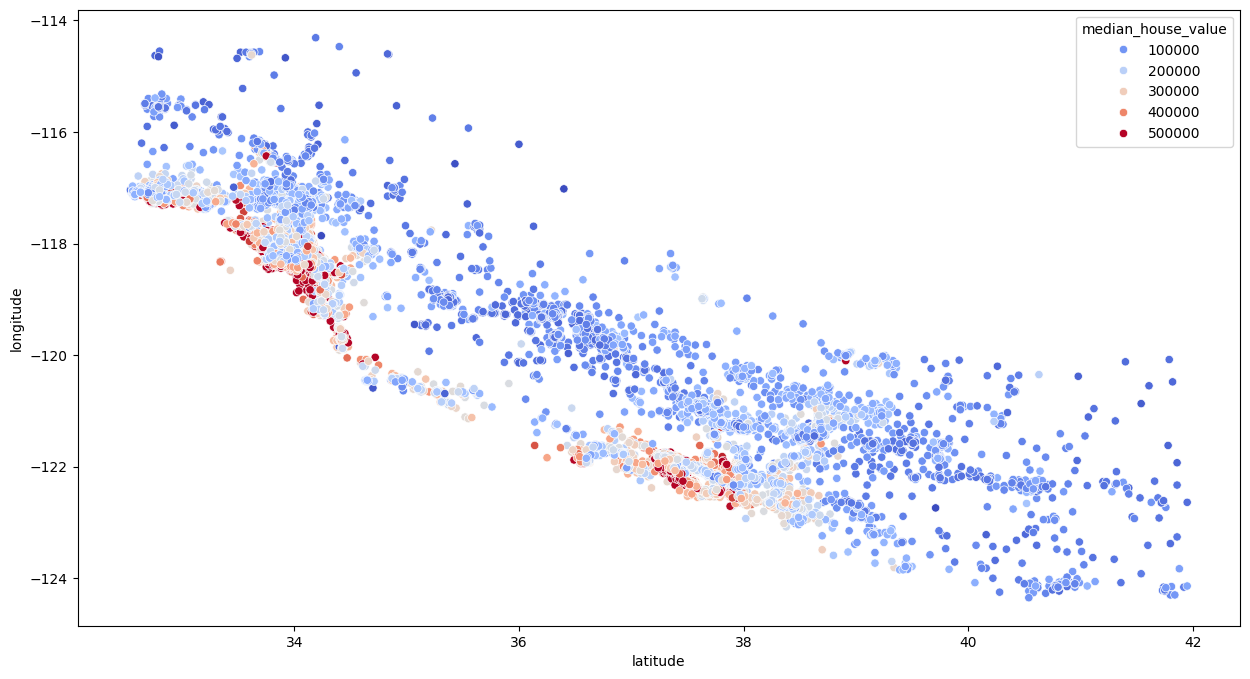

In [60]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y = "longitude", data = train_data, hue = "median_house_value",palette="coolwarm")

The dots closes to the lines are closer to the sea, with that we can see how the proximity to the ocean impacts on the house prices, since the big majority of red dots are on the below area.

# Feature Engineering
Combining features into more interesting features

Looking at the heatmap we can see that the variable combined below by themselfs do not have a great impact on the price, having really low correlation, such as household,  with a correlation of 0,074.

In [61]:
# how many of the rooms are bedrooms
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
#how many rooms per household
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


<Axes: >

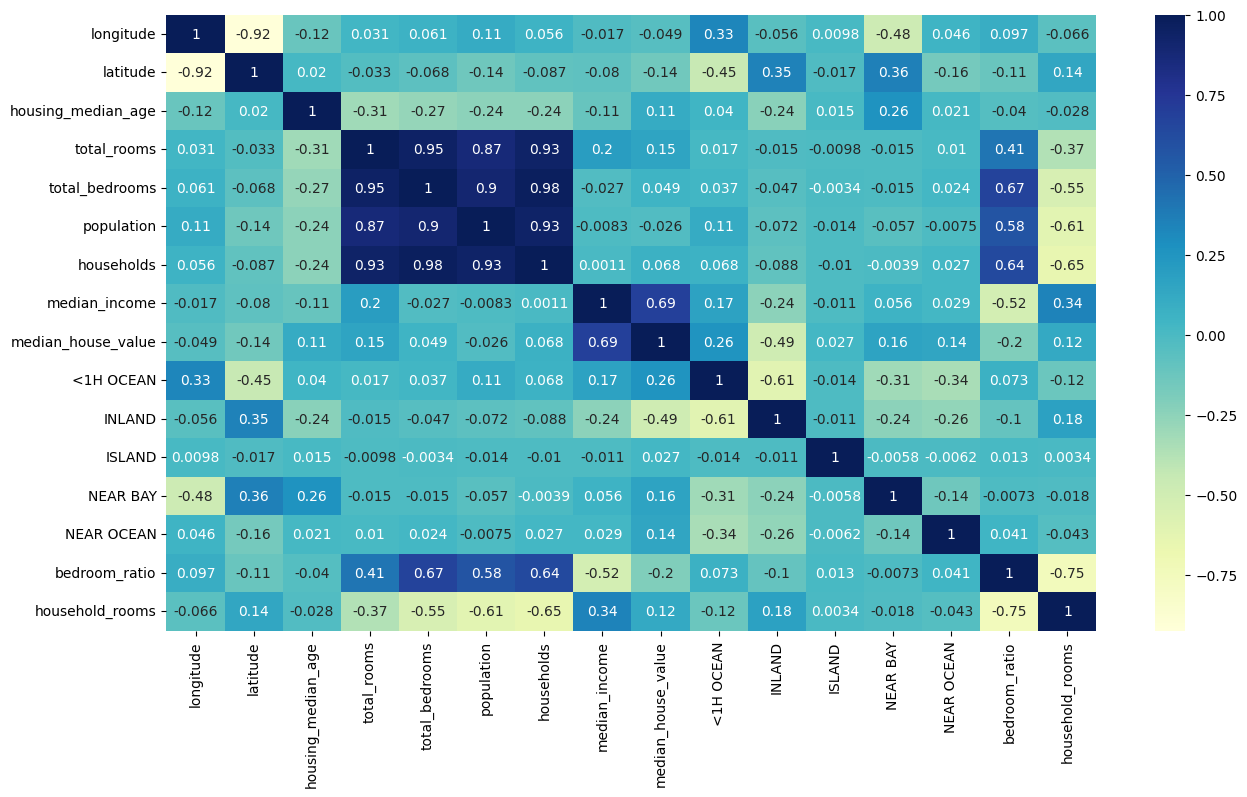

In [62]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu") 

# Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import StandardScaler #used to scale the data 

In [64]:
#scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
#X_train_s = scaler.fit_transform(X_train)#scalling the data

reg = LinearRegression()


reg.fit(X_train,y_train)


LinearRegression()

## Testing the model
Using the test_data to check the model accuracy

In [65]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) # +1 to prevent 0 values
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1) # +1 to prevent 0 values
test_data['population'] = np.log(test_data['population'] + 1) # +1 to prevent 0 values
test_data['households'] = np.log(test_data['households'] + 1) # +1 to prevent 0 values

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# how many of the rooms are bedrooms
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
#how many rooms per household
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [66]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17709,-121.82,37.33,23.0,8.095599,6.473891,7.856707,6.447306,4.3782,True,False,False,False,False,0.799680,1.255656
14993,-117.03,32.72,37.0,7.693026,6.122493,7.323831,6.102559,3.0588,False,False,False,False,True,0.795850,1.260623
1744,-122.35,37.96,35.0,7.190676,5.849325,6.931472,5.690359,2.0724,False,False,False,True,False,0.813460,1.263659
7290,-118.22,33.98,36.0,7.323171,6.118097,7.311218,6.107023,2.1044,True,False,False,False,False,0.835444,1.199139
20062,-119.04,35.96,18.0,7.080026,5.733341,7.203406,5.627621,1.8750,False,True,False,False,False,0.809791,1.258085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,-118.62,34.18,25.0,8.047190,6.150603,7.124478,6.086775,6.4044,True,False,False,False,False,0.764317,1.322078
3831,-118.43,34.20,29.0,8.023552,6.543912,7.571988,6.522093,3.1118,True,False,False,False,False,0.815588,1.230211
15100,-116.95,32.82,18.0,8.019284,6.385194,7.552237,6.390241,3.8024,True,False,False,False,False,0.796230,1.254927
2868,-118.94,35.37,33.0,8.123558,6.609349,7.763446,6.558198,2.0643,False,True,False,False,False,0.813603,1.238688


In [68]:
reg.score(X_test,y_test)

0.6683350025936061